In [2]:
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
import seaborn as sns

In [3]:
file = pd.read_csv("clean_data.csv")

In [26]:
file.head()
file.drop('Unnamed: 0', axis=1, inplace=True)

<AxesSubplot:xlabel='price', ylabel='Count'>

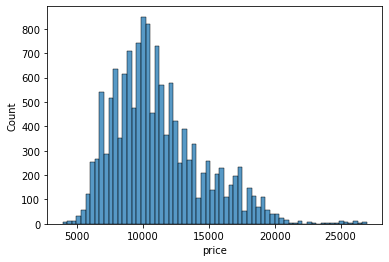

In [6]:
sns.histplot(data=file, x="price")

<AxesSubplot:xlabel='year', ylabel='Count'>

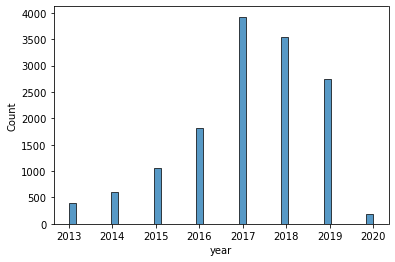

In [7]:
sns.histplot(data=file, x="year")

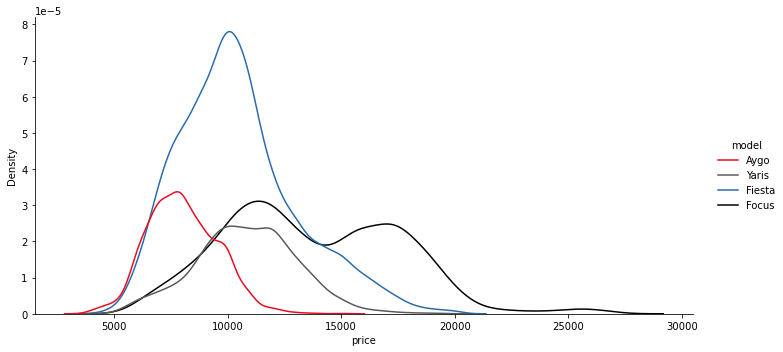

In [15]:
color_dict = {"Aygo":"#EB0A1E", "Yaris":"#58595B", "Fiesta":"#2A6BAC","Focus":"#000000"}

sns.displot(file,x='price',hue='model',kind='kde',height=5,aspect=2, palette = color_dict)

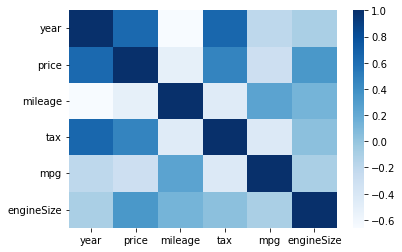

In [27]:
corrs = file.corr()
sns.heatmap(corrs,cmap="Blues")
plt.show() 

In [33]:
corrs

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.636536,-0.660621,0.643684,-0.202957,-0.100257
price,0.636536,1.000000,-0.516829,0.462786,-0.299283,0.333518
mileage,-0.660621,-0.516829,1.000000,-0.455686,0.247953,0.126194
tax,0.643684,0.462786,-0.455686,1.000000,-0.427164,0.037269
mpg,-0.202957,-0.299283,0.247953,-0.427164,1.000000,-0.098421
engineSize,-0.100257,0.333518,0.126194,0.037269,-0.098421,1.000000


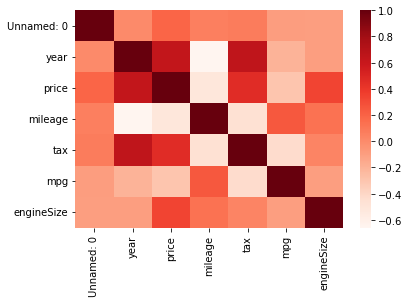

In [25]:
corrs = file.corr()
sns.heatmap(corrs,cmap="Reds")
plt.show() 

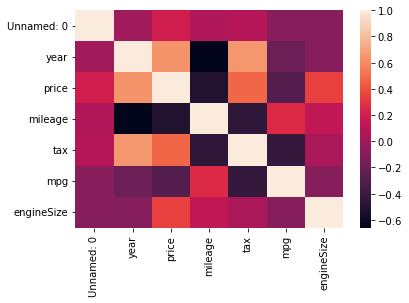

In [23]:
corrs = file.corr()
sns.heatmap(corrs)
plt.show() 

In [28]:
file.describe()

,year,price,mileage,tax,mpg,engineSize
count,14266.000000,14266.000000,14266.000000,14266.000000,14266.000000,14266.000000
mean,2017.161713,11140.199355,18815.673840,102.319150,61.495205,1.196355
std,1.530618,3431.543658,12425.640064,64.202458,9.064621,0.292362
min,2013.000000,3891.000000,1.000000,0.000000,34.500000,0.000000
25%,2016.000000,8695.000000,9283.250000,20.000000,56.500000,1.000000
50%,2017.000000,10498.000000,16224.000000,145.000000,60.100000,1.000000
75%,2018.000000,12995.000000,26530.250000,145.000000,65.700000,1.500000
max,2020.000000,26995.000000,58500.000000,265.000000,88.300000,2.300000


In [32]:
mask2 = ((file["model"] == "Aygo") & (file["price"] < (11140.20+2*(3431.54))))
df3 = file.loc[mask2,:]
#df3.reset_index(drop=True, inplace=True)
# df3.columns =[]
df3

mask3 = ((file["model"] == "Yaris") & (file["price"] < (11140.20+2*(3431.54)))) 
df4 = file.loc[mask3,:]
#df4.reset_index(drop=True, inplace=True)
# df4.columns =[]
df4

mask4 = ((file["model"] == "Fiesta") & (file["price"] < (11140.20+2*(3431.54)))) 
df5 = file.loc[mask4,:]
#df5.reset_index(drop=True, inplace=True)
# df5.columns =[]
df5

mask5 = ((file["model"] == "Focus") & (file["price"] < (11140.20+2*(3431.54)))) 
df6 = file.loc[mask5,:]
#df6.reset_index(drop=True, inplace=True)
# df6.columns =[]
df6

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10081,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
10082,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
10083,Focus,2018,10000,Manual,48141,Petrol,145,61.4,1.0
10086,Focus,2017,14960,Manual,23554,Petrol,145,41.5,2.0
10087,Focus,2019,17970,Manual,10985,Diesel,145,74.3,1.5
...,...,...,...,...,...,...,...,...,...
14260,Focus,2018,12849,Manual,16128,Petrol,145,57.7,1.0
14261,Focus,2018,14000,Manual,8724,Diesel,145,74.3,1.5
14263,Focus,2017,11000,Manual,17339,Petrol,145,60.1,1.0
14264,Focus,2016,16000,Manual,19834,Petrol,200,41.5,2.0


In [36]:
list1 = [df3, df4, df5, df6]

In [37]:
df100 = pd.concat(list1)

In [38]:
df100.describe()

,year,price,mileage,tax,mpg,engineSize
count,13684.000000,13684.000000,13684.000000,13684.000000,13684.000000,13684.000000
mean,2017.101140,10767.051812,19254.871529,100.390237,61.914038,1.176476
std,1.523621,2946.628702,12432.363844,64.799409,8.689466,0.266305
min,2013.000000,3891.000000,1.000000,0.000000,39.200000,0.000000
25%,2016.000000,8500.000000,9774.250000,20.000000,56.500000,1.000000
50%,2017.000000,10400.000000,16750.000000,145.000000,60.100000,1.000000
75%,2018.000000,12498.000000,27088.250000,145.000000,65.700000,1.500000
max,2020.000000,18000.000000,58500.000000,265.000000,88.300000,2.000000


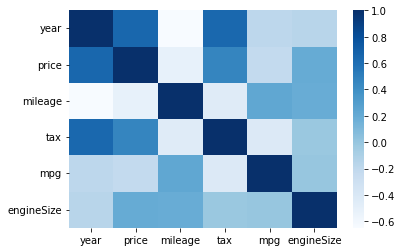

In [39]:
corrs = df100.corr()
sns.heatmap(corrs,cmap="Blues")
plt.show() 

In [40]:
corrs

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.650662,-0.648883,0.640863,-0.186558,-0.164836
price,0.650662,1.000000,-0.515019,0.463395,-0.219018,0.198578
mileage,-0.648883,-0.515019,1.000000,-0.445934,0.233345,0.191603
tax,0.640863,0.463395,-0.445934,1.000000,-0.422869,-0.014924
mpg,-0.186558,-0.219018,0.233345,-0.422869,1.000000,0.000813
engineSize,-0.164836,0.198578,0.191603,-0.014924,0.000813,1.000000


The r-value is: 0.6506623276401622


C:\Users\SAMSLO~1\AppData\Local\Temp/ipykernel_9652/1061626359.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values,regress_values,"r-", color = "#2A6BAC")


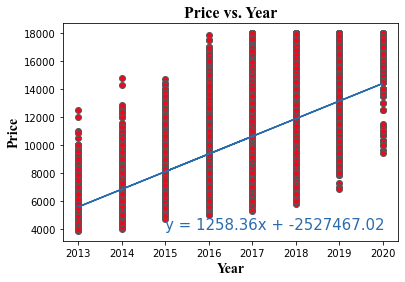

In [42]:
r8 = corrs.iloc[1]["year"]
print(f"The r-value is: {r8}")

x_values = df100['year']
y_values = df100['price']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o", facecolors="#EB0A1E", edgecolors="#58595B")
plt.plot(x_values,regress_values,"r-", color = "#2A6BAC")
plt.annotate(line_eq,(2015,4000),fontsize=15,color="#2A6BAC")
plt.title("Price vs. Year", fontsize=16, fontweight="bold", fontname="Times New Roman")
plt.xlabel('Year', fontsize=14, fontweight="bold", fontname="Times New Roman")
plt.ylabel('Price', fontsize=14, fontweight="bold", fontname="Times New Roman")
plt.show()

<AxesSubplot:title={'center':'price'}, xlabel='fuelType'>

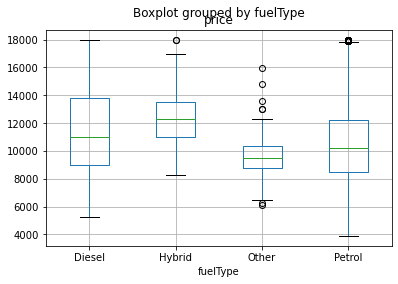

In [43]:
df100.boxplot(by ='fuelType', column =["price"], grid = True)

In [44]:
count = df100["fuelType"].value_counts()
count

Petrol    11538
Diesel     1543
Hybrid      536
Other        67
Name: fuelType, dtype: int64

In [45]:
(536+67)/(11538+1543+536+67)

0.044066062554808536

In [67]:
mask2 = df100["engineSize"] != 0 
df3 = df100.loc[mask2,:]
#df3.reset_index(drop=True, inplace=True)
# df3.columns =[]
df3




,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Aygo,2017,9250,Manual,4414,Other,150,68.9,1.0
1,Aygo,2017,7100,Manual,32351,Petrol,0,68.9,1.0
2,Aygo,2016,6500,Manual,26193,Petrol,0,69.0,1.0
3,Aygo,2017,7650,Manual,12134,Petrol,0,68.9,1.0
4,Aygo,2016,6999,Manual,21123,Petrol,0,69.0,1.0
...,...,...,...,...,...,...,...,...,...
14260,Focus,2018,12849,Manual,16128,Petrol,145,57.7,1.0
14261,Focus,2018,14000,Manual,8724,Diesel,145,74.3,1.5
14263,Focus,2017,11000,Manual,17339,Petrol,145,60.1,1.0
14264,Focus,2016,16000,Manual,19834,Petrol,200,41.5,2.0


C:\Users\SAMSLO~1\AppData\Local\Temp/ipykernel_9652/4082830527.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values,regress_values,"r-", color = "#2A6BAC")


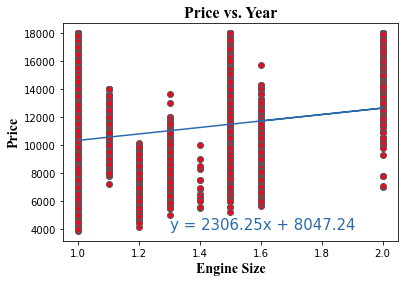

In [74]:
x_values = df3['engineSize']
y_values = df3['price']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o", facecolors="#EB0A1E", edgecolors="#58595B")
plt.plot(x_values,regress_values,"r-", color = "#2A6BAC")
plt.annotate(line_eq,(1.3,4000),fontsize=15,color="#2A6BAC")
plt.title("Price vs. Year", fontsize=16, fontweight="bold", fontname="Times New Roman")
plt.xlabel('Engine Size', fontsize=14, fontweight="bold", fontname="Times New Roman")
plt.ylabel('Price', fontsize=14, fontweight="bold", fontname="Times New Roman")
plt.show()

In [69]:
corrs = df3.corr()
corrs

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.651441,-0.648747,0.641365,-0.186706,-0.169451
price,0.651441,1.000000,-0.515545,0.464235,-0.219556,0.203893
mileage,-0.648747,-0.515545,1.000000,-0.446219,0.233553,0.196146
tax,0.641365,0.464235,-0.446219,1.000000,-0.423045,-0.017266
mpg,-0.186706,-0.219556,0.233553,-0.423045,1.000000,0.002224
engineSize,-0.169451,0.203893,0.196146,-0.017266,0.002224,1.000000


In [60]:
count = df4["fuelType"].value_counts()
count

Petrol    11538
Diesel     1543
Name: fuelType, dtype: int64

In [61]:
df4.describe()

,year,price,mileage,tax,mpg,engineSize
count,13081.000000,13081.000000,13081.000000,13081.000000,13081.000000,13081.000000
mean,2017.129501,10711.453100,19157.663405,102.770813,61.175392,1.164047
std,1.519361,2974.273903,12409.508261,63.732884,8.038395,0.263333
min,2013.000000,3891.000000,1.000000,0.000000,39.200000,0.000000
25%,2016.000000,8498.000000,9694.000000,20.000000,56.500000,1.000000
50%,2017.000000,10295.000000,16595.000000,145.000000,60.100000,1.000000
75%,2018.000000,12476.000000,26965.000000,145.000000,65.700000,1.300000
max,2020.000000,18000.000000,58500.000000,265.000000,88.300000,2.000000


In [66]:
mask2 = df4["engineSize"] != 0
df3 = df4.loc[mask2,:]
df3

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1,Aygo,2017,7100,Manual,32351,Petrol,0,68.9,1.0
2,Aygo,2016,6500,Manual,26193,Petrol,0,69.0,1.0
3,Aygo,2017,7650,Manual,12134,Petrol,0,68.9,1.0
4,Aygo,2016,6999,Manual,21123,Petrol,0,69.0,1.0
5,Aygo,2015,6495,Manual,33931,Petrol,0,69.0,1.0
...,...,...,...,...,...,...,...,...,...
14260,Focus,2018,12849,Manual,16128,Petrol,145,57.7,1.0
14261,Focus,2018,14000,Manual,8724,Diesel,145,74.3,1.5
14263,Focus,2017,11000,Manual,17339,Petrol,145,60.1,1.0
14264,Focus,2016,16000,Manual,19834,Petrol,200,41.5,2.0


In [ ]:
r8 = corrs2.iloc[1]["year"]
print(f"The r-value is: {r8}")

x_values = df9['year']
y_values = df9['price']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o", facecolors="#EB0A1E", edgecolors="#58595B")
plt.plot(x_values,regress_values,"r-", color = "#2A6BAC")
plt.annotate(line_eq,(2015,4000),fontsize=15,color="#2A6BAC")
plt.title("Price vs. Year", fontsize=16, fontweight="bold", fontname="Times New Roman")
plt.xlabel('Year', fontsize=14, fontweight="bold", fontname="Times New Roman")
plt.ylabel('Price', fontsize=14, fontweight="bold", fontname="Times New Roman")
plt.show()
